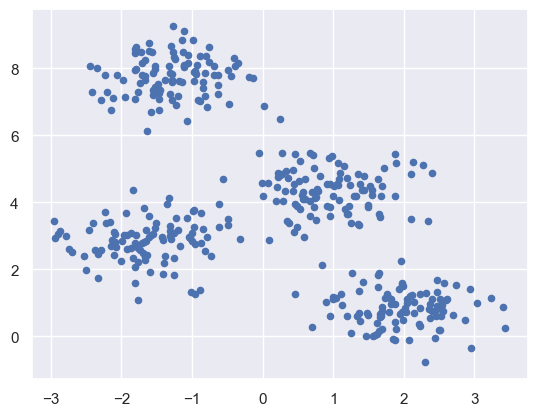

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets._samples_generator import make_blobs
X,y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.6, random_state=0)

plt.scatter(X[:,0], X[:,1], s=20)
plt.show()

In [25]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

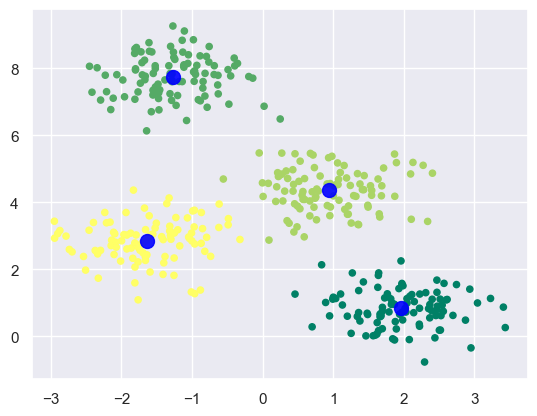

In [26]:
plt.scatter(X[:,0], X[:,-1], c=y_kmeans, s=20, cmap = 'summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="blue", s=100, alpha=0.9)
plt.show()

# 1.1.1 Пример

In [27]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

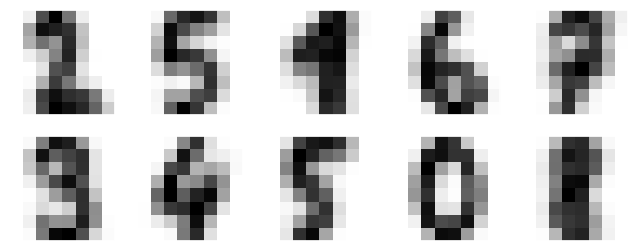

In [28]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit(digits.data)
kmeans.cluster_centers_.shape
fig, ax = plt.subplots(2,5,figsize = (8,3))
centers = kmeans.cluster_centers_.reshape(10,8,8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

# Задание

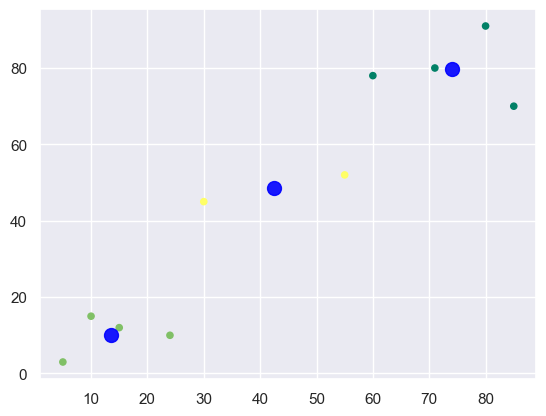

In [29]:
X= np.array([[5,3], [10,15], [15,12], [24,10], [30,45], [85,70], [71,80], [60,78], [55,52], [80,91],])
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
                        
plt.scatter(X[:,0], X[:,-1], c=y_kmeans, s=20, cmap = 'summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="blue", s=100, alpha=0.9)
plt.show()

# Задание:
Выполните кластеризацию для набора данных ирисов Фишера. Выполните предсказания для модели. Поэкспериментируйте с количеством кластеров.

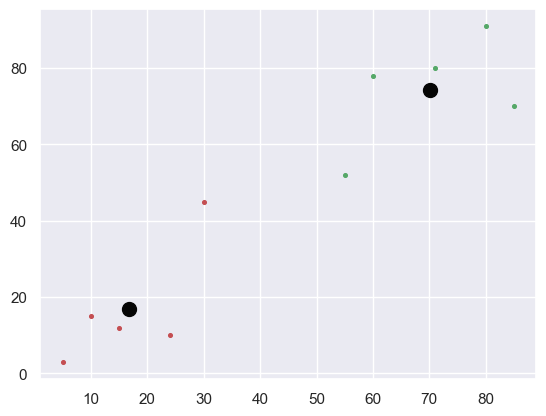

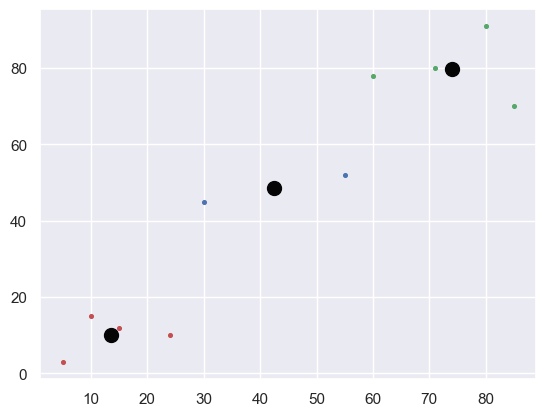

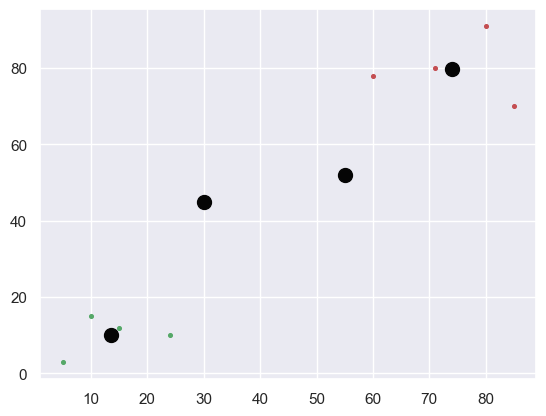

In [30]:
def cluster_and_plot(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    fig, ax = plt.subplots()

    for i in range(n_clusters):
        points = np.array([X[j] for j in range(len(X)) if labels[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

    ax.scatter(centroids[:, 0], centroids[:, 1], s=100, c='#050505')
    plt.show()

cluster_and_plot(2)
cluster_and_plot(3)
cluster_and_plot(4)

# 1.1.2 Пример

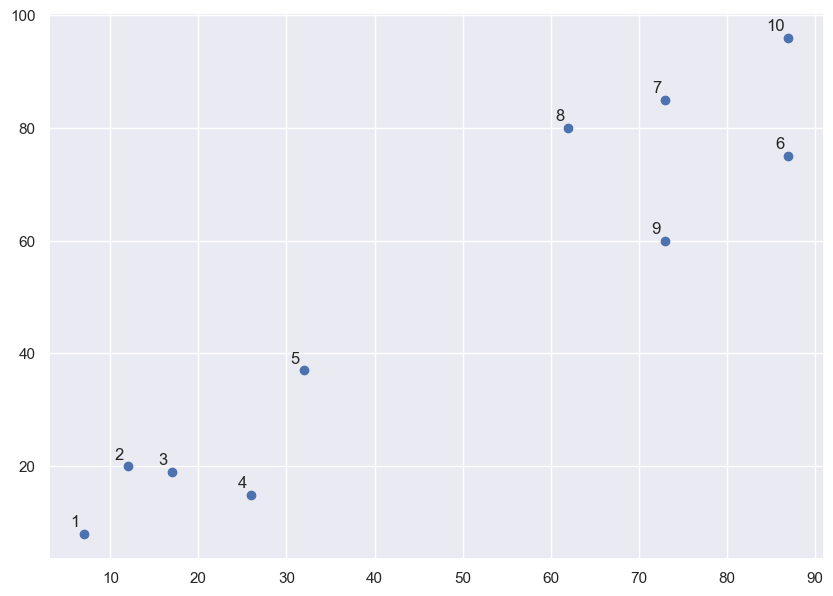

In [32]:
import matplotlib.pyplot as plt
X = np.array(
[[7,8], [12,20], [17,19], [26,15], [32,37], [87,75], [73,85], [62,80], [73,60], [87,96], ]) 
labels = range(1, 11)
plt.figure(figsize = (10, 7))
plt. subplots_adjust(bottom = 0.1)
plt.scatter(X[:,0],X[:,1], label = 'True Position')
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(label,xy = (x, y), xytext = (-3, 3),textcoords = 'offset points', ha = 'right', va = 'bottom')
plt. show()

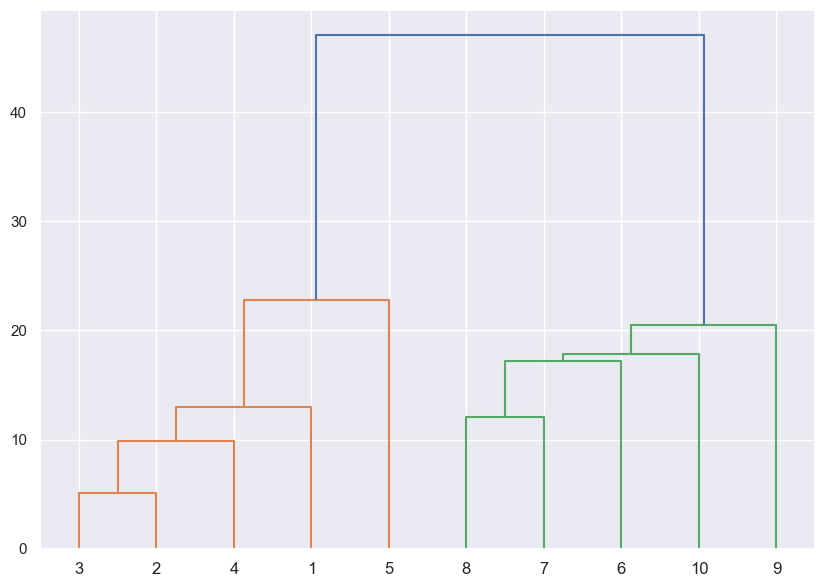

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(X, 'single')
labelList = range(1, 11)
plt.figure(figsize = (10, 7))
dendrogram(linked, orientation = 'top',labels = labelList,
           distance_sort ='descending',show_leaf_counts= True)
plt.show()

# Задание
Выполните иерархическую кластеризацию для набора данных об ирисах Фишера. При этом необходимо использовать любые два признака (длина и ширина чашелистика)

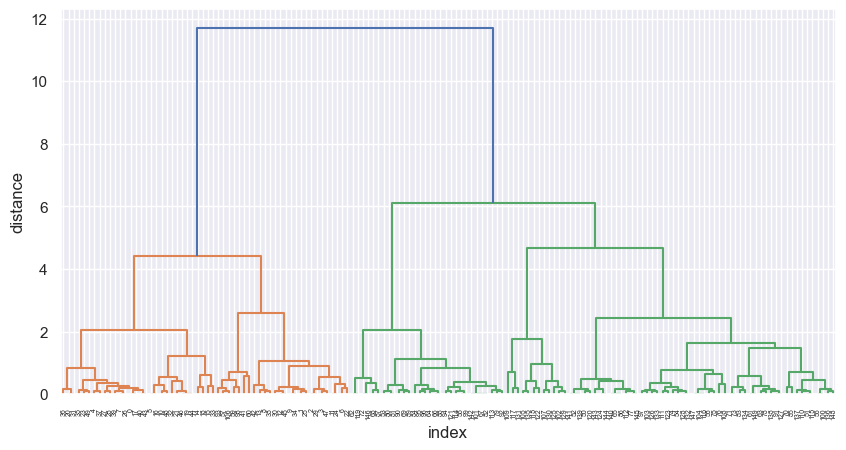

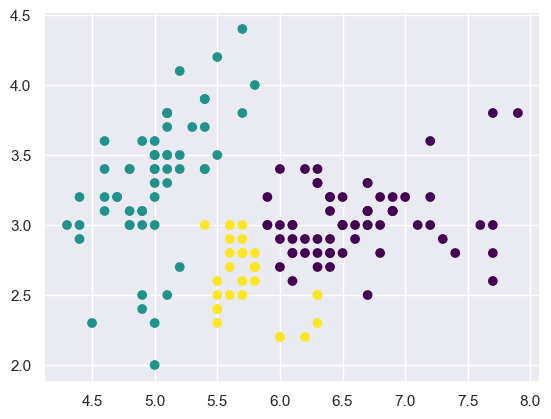

In [35]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris

# Загрузка данных
iris = load_iris()
X = iris.data[:, :2] #длина и ширина чашелистика
y = iris.target

# Иерархическая кластеризация
linkage_matrix = linkage(X, 'ward')

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.xlabel('index')
plt.ylabel('distance')
plt.show()


n_clusters = 3  # Выбираем количество кластеров
clustering = AgglomerativeClustering(n_clusters=n_clusters)
clustering.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap='viridis')


plt.show()
